# Parte IV: Analisar salidas

En este cuaderno analizaremos las salidas del modelo COSIPY.  Para eso, usaremos la librería `xarray` para leer los datos que están en la carpeta.

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('cosipy/data/output/Chuecon_ERA5_20200101-20200331.nc')
ds

<xarray.Dataset>
Dimensions:       (lat: 34, lon: 34, time: 364)
Coordinates:
  * time          (time) datetime64[ns] 2020-01-01 ... 2020-03-31T18:00:00
  * lat           (lat) float64 -11.95 -11.95 -11.95 ... -11.92 -11.92 -11.92
  * lon           (lon) float64 -76.08 -76.08 -76.07 ... -76.05 -76.05 -76.05
Data variables:
    HGT           (lat, lon) float32 ...
    MASK          (lat, lon) float32 ...
    SLOPE         (lat, lon) float32 ...
    ASPECT        (lat, lon) float32 ...
    T2            (time, lat, lon) float64 ...
    RH2           (time, lat, lon) float64 ...
    U2            (time, lat, lon) float64 ...
    PRES          (time, lat, lon) float64 ...
    G             (time, lat, lon) float64 ...
    RRR           (time, lat, lon) float64 ...
    N             (time, lat, lon) float64 ...
    RAIN          (time, lat, lon) float64 ...
    SNOWFALL      (time, lat, lon) float64 ...
    LWin          (time, lat, lon) float64 ...
    LWout         (time, lat, lon) float64 ...
    H             (time, lat, lon) float64 ...
    LE            (time, lat, lon) float64 ...
    B             (time, lat, lon) float64 ...
    QRR           (time, lat, lon) float64 ...
    surfMB        (time, lat, lon) float64 ...
    MB            (time, lat, lon) float64 ...
    Q             (time, lat, lon) float64 ...
    SNOWHEIGHT    (time, lat, lon) float64 ...
    TOTALHEIGHT   (time, lat, lon) float64 ...
    TS            (time, lat, lon) float64 ...
    ALBEDO        (time, lat, lon) float64 ...
    LAYERS        (time, lat, lon) float64 ...
    ME            (time, lat, lon) float64 ...
    intMB         (time, lat, lon) float64 ...
    EVAPORATION   (time, lat, lon) float64 ...
    SUBLIMATION   (time, lat, lon) float64 ...
    CONDENSATION  (time, lat, lon) float64 ...
    DEPOSITION    (time, lat, lon) float64 ...
    REFREEZE      (time, lat, lon) float64 ...
    subM          (time, lat, lon) float64 ...
    Z0            (time, lat, lon) float64 ...
    surfM         (time, lat, lon) float64 ...
Attributes:
    Start_from_restart_file:                    False
    Stake_evaluation:                           False
    WRF_simulation:                             False
    Compression_level:                          2
    Slurm_use:                                  False
    Full_fiels:                                 False
    Force_use_TP:                               False
    Force_use_N:                                False
    Tile_of_glacier_of_interest:                False
    Time_step_input_file_seconds:               21600
    Max_layers:                                 200
    Z_measurment_height:                        2.0
    Stability_correction:                       Ri
    Albedo_method:                              Oerlemans98
    Densification_method:                       Boone
    Penetrating_method:                         Bintanja95
    Roughness_method:                           Moelg12
    Saturation_water_vapour_method:             Sonntag90
    Initial_snowheight:                         0.2
    Initial_snow_layer_heights:                 0.1
    Initial_glacier_height:                     40.0
    Initial_glacier_layer_heights:              0.5
    Initial_top_density_snowpack:               300.0
    Initial_bottom_density_snowpack:            600.0
    Temperature_bottom:                         270.16
    Const_init_temp:                            0.1
    Center_snow_transfer_function:              1.0
    Spread_snow_transfer_function:              1
    Multiplication_factor_for_RRR_or_SNOWFALL:  1.0
    Minimum_snow_layer_height:                  0.0001
    Minimum_snowfall:                           0.0001
    Remesh_method:                              log_profile
    First_layer_height_log_profile:             0.01
    Layer_stretching_log_profile:               1.2
    Merge_max:                                  1
    Density_threshold_merging:                  5
    Temperature_t

## Balance de masa distribuido

<xarray.DataArray 'MB' ()>
array(-2.51290164)
<xarray.DataArray 'MB' ()>
array(-1.63916153)
<xarray.DataArray 'MB' ()>
array(-3.22124156)


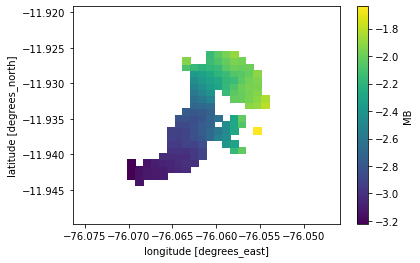

In [3]:
print(ds['MB'].sum('time').where(ds['MASK']==1).mean())
print(ds['MB'].sum('time').where(ds['MASK']==1).max())
print(ds['MB'].sum('time').where(ds['MASK']==1).min())
ds['MB'].sum('time').where(ds['MASK']==1).plot()


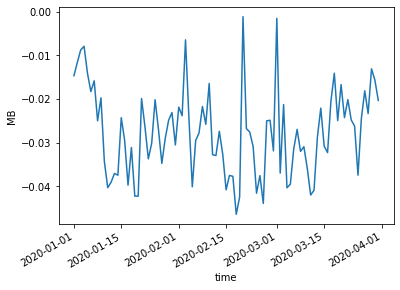

In [4]:
## Balance de masa promedio para todo el glaciar 
ds['MB'].resample(time='1D').sum().where(ds['MASK']==1).mean(('lat', 'lon')).plot()

## Albedo superficial

<xarray.DataArray 'ALBEDO' ()>
array(0.44634219)
<xarray.DataArray 'ALBEDO' ()>
array(0.57571466)
<xarray.DataArray 'ALBEDO' ()>
array(0.33717844)


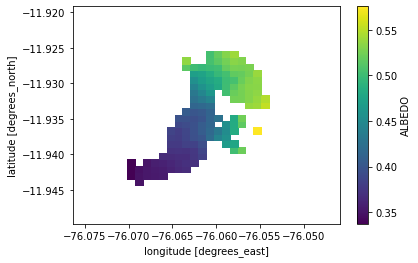

In [5]:
print(ds['ALBEDO'].mean('time').where(ds['MASK']==1).mean())
print(ds['ALBEDO'].mean('time').where(ds['MASK']==1).max())
print(ds['ALBEDO'].mean('time').where(ds['MASK']==1).min())
ds['ALBEDO'].mean('time').where(ds['MASK']==1).plot()

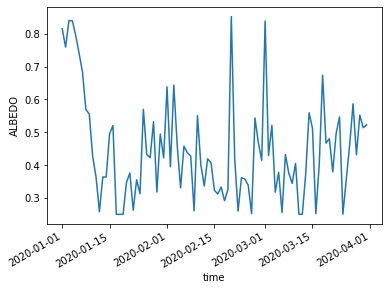

In [6]:
# Albedo superficial promediado para todo el glaciar
ds['ALBEDO'].resample(time='1D').mean().where(ds['MASK']==1).mean(('lat', 'lon')).plot()

## ¿Qué otras variables podemos visualizar?

## Correlación

Podemos analizar las correlaciones que tienen las diferentes variables con el balance de masa. Para eso, vamos a trabajar con promedios y acumulados diarios.

In [7]:
# Acumulado diario
sum_var = ds[['MB','RRR', 'SNOWFALL']].resample(time='1D').sum().where(ds['MASK']==1).mean(('lat', 'lon'))
# Promedio diario
mean_var = ds[['T2','G', 'ALBEDO', 'LWin', 'LWout']].resample(time='1D').mean().where(ds['MASK']==1).mean(('lat', 'lon'))

In [8]:
mean_var

<xarray.Dataset>
Dimensions:  (time: 91)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-03-31
Data variables:
    T2       (time) float64 273.2 272.7 273.1 273.7 ... 273.6 272.5 272.5 273.3
    G        (time) float64 276.4 240.7 246.6 246.0 ... 163.0 133.8 156.5 185.8
    ALBEDO   (time) float64 0.8154 0.7593 0.8402 0.8398 ... 0.5523 0.5137 0.5225
    LWin     (time) float64 308.9 307.5 299.4 301.3 ... 312.4 303.1 307.5 309.3
    LWout    (time) float64 -309.9 -310.4 -308.9 -308.2 ... -304.4 -307.3 -307.6

In [9]:
# Juntando los dataset
day_data = xr.merge([sum_var, mean_var])

In [10]:
# Correlación de las variables
plot_corr = day_data.to_dataframe().corr()
plot_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,MB,RRR,SNOWFALL,T2,G,ALBEDO,LWin,LWout
MB,1.00,0.52,0.60,-0.42,-0.43,0.82,0.20,-0.04
RRR,0.52,1.00,0.86,0.04,-0.42,0.42,0.40,-0.17
SNOWFALL,0.60,0.86,1.00,-0.15,-0.28,0.55,0.26,-0.06
T2,-0.42,0.04,-0.15,1.00,0.09,-0.29,0.19,-0.27
G,-0.43,-0.42,-0.28,0.09,1.00,0.06,-0.56,0.37
ALBEDO,0.82,0.42,0.55,-0.29,0.06,1.00,0.12,0.03
LWin,0.20,0.40,0.26,0.19,-0.56,0.12,1.00,-0.82
LWout,-0.04,-0.17,-0.06,-0.27,0.37,0.03,-0.82,1.00
